In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
forest_data = pd.read_csv('datasets/forest_cover.csv')
land_data = pd.read_csv('datasets/land_util.csv')
car_data = pd.read_csv('datasets/car_park.csv')
air_poll = pd.read_csv('datasets/pollution.csv')

In [28]:
forest_data.set_index('Country', inplace=True)

In [29]:
air_poll.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN


In [30]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(air_poll):
    # Drop columns: 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)' and 8 other columns
    air_poll = air_poll.drop(columns=['PM10 temporal coverage (%)', 'NO2 temporal coverage (%)', 'PM25 temporal coverage (%)', 'Reference', 'Number and type of monitoring stations', 'Version of the database', 'Status', 'City or Locality', 'WHO Region', 'ISO3'])
    return air_poll

air_poll_clean = clean_data(air_poll.copy())
air_poll_clean

,WHO Country Name,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3)
0,Afghanistan,2019,119.77,NaN,NaN
1,Albania,2015,NaN,17.65,26.63
2,Albania,2016,14.32,24.56,24.78
3,Albania,2015,NaN,NaN,23.96
4,Albania,2016,NaN,NaN,26.26
...,...,...,...,...,...
32186,South Africa,2015,7.47,24.64,7.64
32187,South Africa,2016,8.42,33.28,7.27
32188,South Africa,2017,6.83,20.49,8.72
32189,South Africa,2018,6.10,17.99,7.15


In [31]:
air_poll_clean = air_poll_clean.loc[air_poll_clean['Measurement Year'] == 2019]
air_poll_clean = air_poll_clean.groupby('WHO Country Name').mean().drop(columns = 'Measurement Year')

In [32]:
#air_poll_clean.set_index('WHO Country Name', inplace=True)

In [33]:
merged = air_poll_clean.join(forest_data).drop(columns = 'NUTS_CODE')

In [34]:
land_data.drop(columns=['NUTS_CODE', 'YEAR'], inplace=True)

In [35]:
land_data.groupby('Country').mean()

,STAT
Country,
Austria,80.700000
Belgium,85.925000
Bulgaria,40.100000
Croatia,59.575000
Cyprus,53.575000
Czechia,78.300000
Denmark,91.125000
EU28,65.135000
Estonia,65.900000


In [36]:
land_data.set_index('Country', inplace=True)

In [37]:
merged = merged.join(land_data)
merged.rename(columns = {'STAT': 'Agricultural land usage'}, inplace=True)

In [38]:
#merged.drop(columns ='Country', inplace=True)


In [39]:
#merged.set_index('Country', inplace=True)

In [40]:
life = pd.read_csv('datasets/life_exp.csv')

In [41]:
life.columns = life.iloc[0,:]

In [42]:
life.drop(index=0, inplace=True)

In [43]:
life.columns

Index(['Countries, territories and areas', 'Year', 'Both sexes'], dtype='object', name=0)

In [44]:
life.drop(columns='Year', inplace=True)

In [45]:
life.rename(columns={'Both sexes': 'Life expectancy', 'Countries, territories and areas': 'Country'}, inplace=True)
life.set_index('Country', inplace=True)

In [46]:
merged

,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),NFI2015,CLC2018,HRL2015,Agricultural land usage
WHO Country Name,,,,,,,
Afghanistan,119.770000,NaN,NaN,NaN,NaN,NaN,NaN
Albania,10.320000,NaN,NaN,785000.0,711124.0,1091214.3,NaN
Algeria,21.530000,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,24.580000,31.010000,NaN,NaN,NaN,NaN
Argentina,NaN,25.500000,18.250000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
United Kingdom,9.592131,16.043036,21.674393,3155000.0,2046627.0,2770252.0,48.0
United Kingdom,9.592131,16.043036,21.674393,3155000.0,2046627.0,2770252.0,50.5
United States of America,7.319298,18.631515,12.861250,NaN,NaN,NaN,NaN


In [47]:
merged = merged.join(life)

In [48]:
merged.drop(columns = merged.iloc[:, [1, 3, 5]], inplace=True)

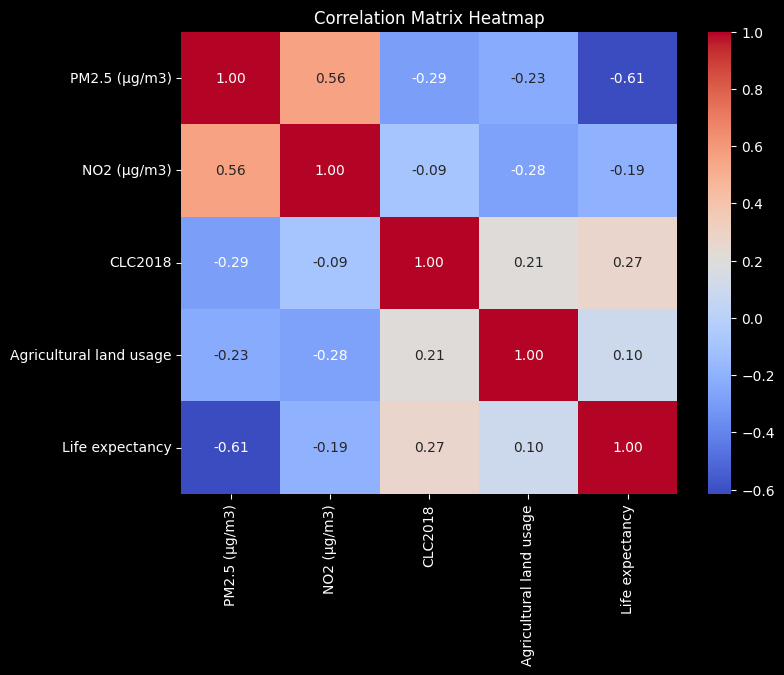

In [52]:
corr_matrix = merged.corr()

plt.style.use('dark_background')

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()